### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/LR4')


In [20]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [21]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [22]:

descent_config = {
    'descent_name': 'тип метода',  # Здесь будет 'full', 'stochastic', 'momentum' или 'adam'.
    'regularized': False,          # Указывает, использовать ли регуляризацию.
    'kwargs': {
        'dimension': x.shape[1],   # Количество признаков (столбцов) в матрице x.
        'lambda_': 0.01,           # Скорость обучения (обязательно для всех методов).
        # 'mu': 0.1                # Добавьте этот параметр, если `regularized` = True.
    }
}

# Перебор доступных методов градиентного спуска
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    # Выполнение шага градиентного спуска
    diff = descent.step(x, y)

    # Вычисление градиента
    gradient = descent.calc_gradient(x, y)

    # Прогнозирование
    predictions = descent.predict(x)

    # Проверки
    assert gradient.shape[0] == descent_config['kwargs']['dimension'], f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == descent_config['kwargs']['dimension'], f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'


In [28]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

print(regression.fit(x, y))

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [81]:
data = pd.read_csv('autos.csv')

In [82]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [83]:
# Проверим информацию о типах данных и пропусках
print(data.info())  # Типы данных, количество ненулевых значений

# Описательная статистика для числовых признаков
print(data.describe())  # Статистика: среднее, медиана, мин/макс

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB
None
             powerPS      kilometer  autoAgeMonths          price
count  241190.000000  241190.000000  241190.000000  241190.000000
mean      131.271628  123766.677723     144.768676    6887.741892
std        60.622613   39825.955933      73.092598    8024.

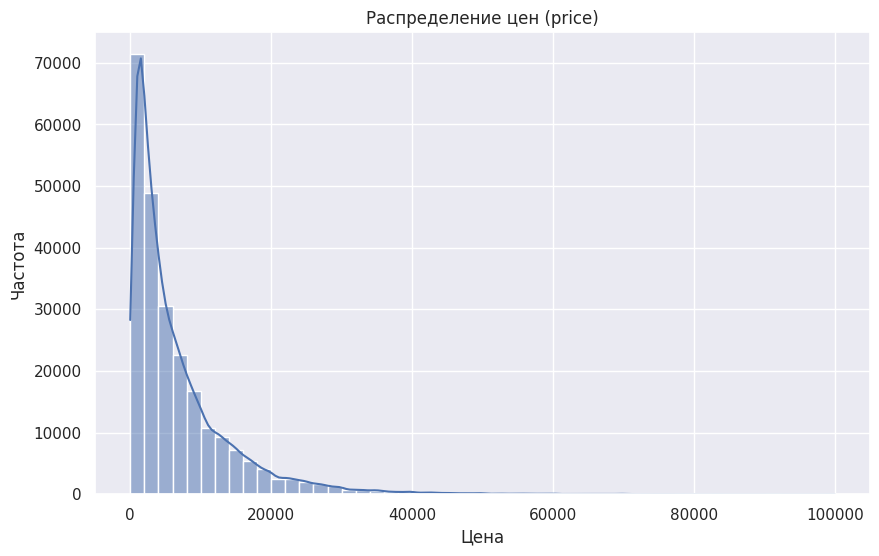

Скошенность (Skewness): 3.0514272240505105
Куртозис (Kurtosis): 15.624816111407625


In [33]:
# Построение гистограммы целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50)
plt.title('Распределение цен (price)')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

# Проверим, есть ли сильная асимметрия
print(f"Скошенность (Skewness): {data['price'].skew()}")
print(f"Куртозис (Kurtosis): {data['price'].kurt()}")


скошеная вправо, логрифмировать?

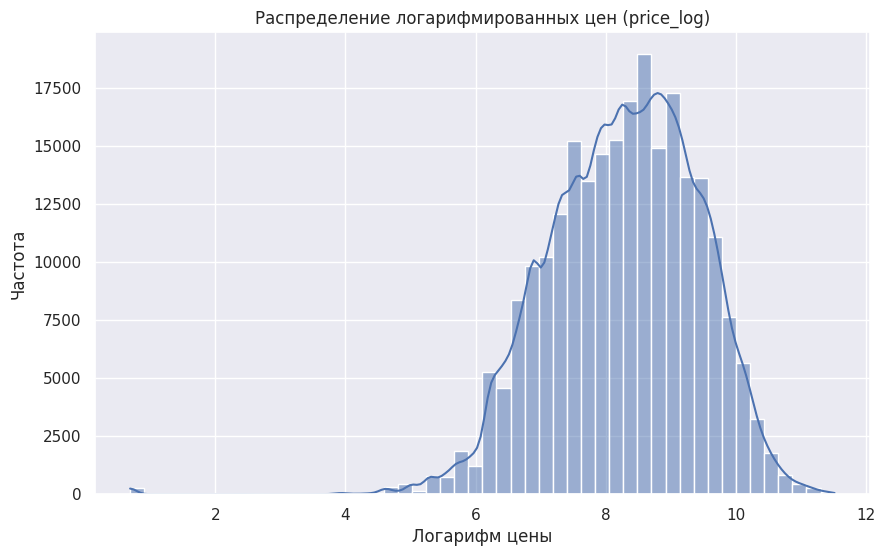

In [35]:
# Применим логарифмическое преобразование
data['price_log'] = np.log1p(data['price'])

# Построим гистограмму для логарифмированных цен
plt.figure(figsize=(10, 6))
sns.histplot(data['price_log'], kde=True, bins=50)
plt.title('Распределение логарифмированных цен (price_log)')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()


In [84]:
# Используем межквартильный размах для поиска выбросов
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Границы для выбросов: {lower_bound} - {upper_bound}")

# Создаём копию исходного DataFrame
data_cleaned = data.copy()

# Удаляем выбросы в копии
data_cleaned = data_cleaned[(data_cleaned['price'] >= lower_bound) & (data_cleaned['price'] <= upper_bound)].reset_index(drop=True)

print(f"Размер данных до удаления выбросов: {data.shape}")
print(f"Размер данных после удаления выбросов: {data_cleaned.shape}")

print(data_cleaned.info())

Границы для выбросов: -9123.5 - 19872.5
Размер данных до удаления выбросов: (241190, 10)
Размер данных после удаления выбросов: (225573, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225573 entries, 0 to 225572
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              225573 non-null  object
 1   model              225573 non-null  object
 2   vehicleType        225573 non-null  object
 3   gearbox            225573 non-null  object
 4   fuelType           225573 non-null  object
 5   notRepairedDamage  225573 non-null  object
 6   powerPS            225573 non-null  int64 
 7   kilometer          225573 non-null  int64 
 8   autoAgeMonths      225573 non-null  int64 
 9   price              225573 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 17.2+ MB
None


In [85]:
categorical = []
numeric = []
other = []

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)
# Определяем типы данных
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        categorical.append(column)
    elif np.issubdtype(data_cleaned[column].dtype, np.number):
        numeric.append(column)
    else:
        other.append(column)

print(f"Категориальные признаки: {categorical}")
print(f"Числовые признаки: {numeric}")
print(f"Другие признаки: {other}")

Категориальные признаки: ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
Числовые признаки: ['powerPS', 'kilometer', 'autoAgeMonths', 'price']
Другие признаки: []


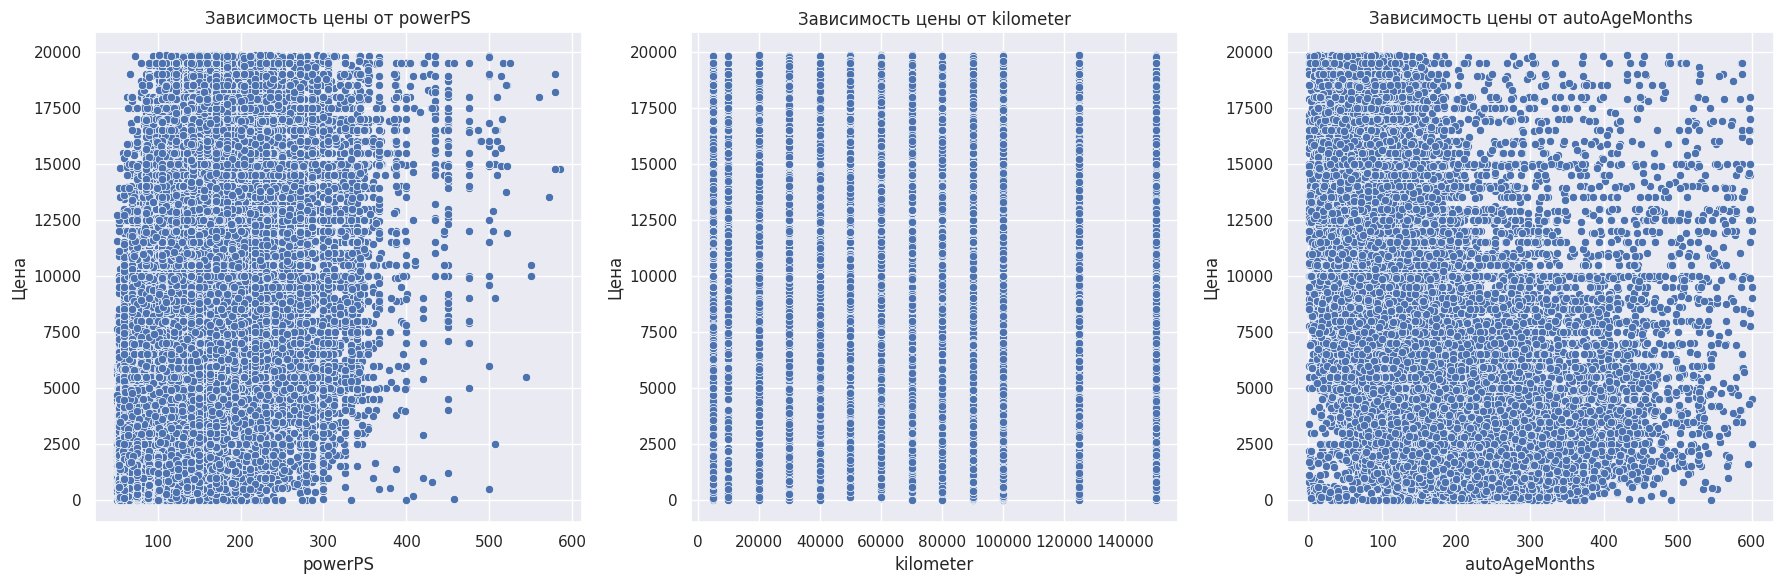

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Числовые признаки для анализа
numeric_to_plot = ['powerPS', 'kilometer', 'autoAgeMonths']

# Построение графиков зависимости
fig, axes = plt.subplots(1, len(numeric_to_plot), figsize=(18, 6))

for i, col in enumerate(numeric_to_plot):
    sns.scatterplot(x=col, y='price', data=data_cleaned, ax=axes[i])
    axes[i].set_title(f'Зависимость цены от {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Цена')

plt.tight_layout()
plt.show()

На основе анализа шрафика все три признака powerPS, kilometer, и autoAgeMonths полезны для моделирования, и их нужно оставить в модели.

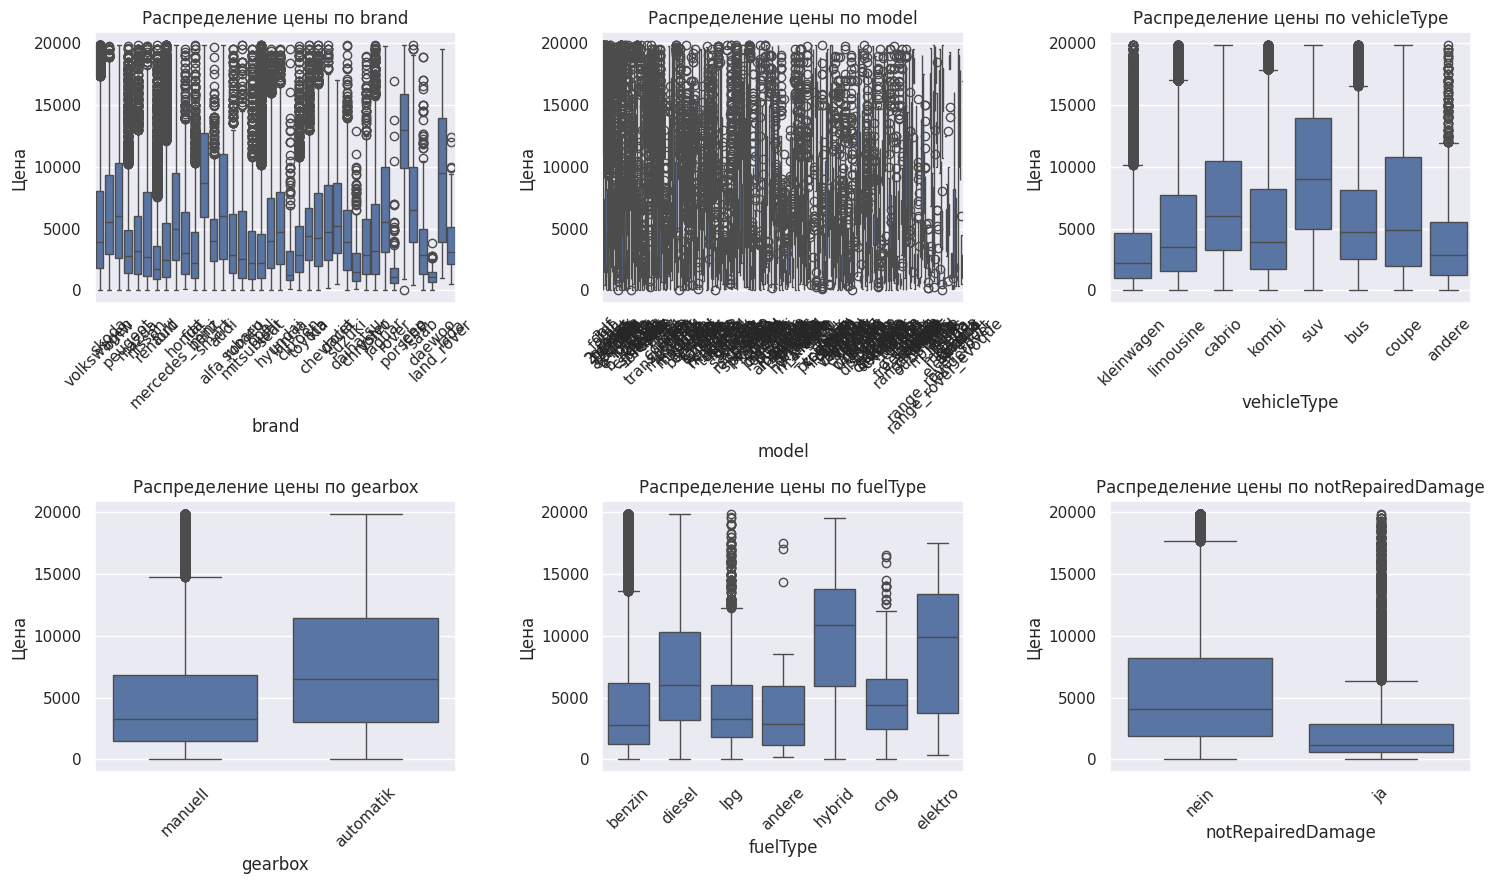

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Категориальные признаки для анализа
categorical_to_plot = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

# Настройка графиков: две строки, три столбца
fig, axes = plt.subplots(2, 3, figsize=(15, 9))  # Две строки, три столбца
axes = axes.flatten()  # Преобразуем в одномерный массив для удобного доступа

# Построение графиков
for i, col in enumerate(categorical_to_plot):
    sns.boxplot(x=col, y='price', data=data_cleaned, ax=axes[i])
    axes[i].set_title(f'Распределение цены по {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Цена')
    axes[i].tick_params(axis='x', rotation=45)  # Поворачиваем подписи оси X для читаемости

plt.tight_layout()  # Подгонка графиков
plt.show()

brand — Убираем, так как его информативность низка из-за равномерности цен.

model — Убираем, поскольку это избыточная и слишком детализированная информация.

vehicleType — Оставляем, так как тип автомобиля является важным фактором ценообразования.

gearbox — Оставляем, поскольку тип коробки передач оказывает заметное влияние на цену.

fuelType — Оставляем, так как тип топлива влияет на распределение ценыи категорий не так уж много

notRepairedDamage — Оставляем, поскольку наличие повреждений критично для стоимости.

In [88]:
# Создание независимой копии и удаление столбцов `brand` и `model`
data_reduced = data_cleaned.copy().drop(columns=['brand', 'model'], errors='ignore')

# Проверка результата
print(data_reduced.columns)
print(data_reduced.info())  # Типы данных, количество ненулевых значений

Index(['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'powerPS',
       'kilometer', 'autoAgeMonths', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225573 entries, 0 to 225572
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicleType        225573 non-null  object
 1   gearbox            225573 non-null  object
 2   fuelType           225573 non-null  object
 3   notRepairedDamage  225573 non-null  object
 4   powerPS            225573 non-null  int64 
 5   kilometer          225573 non-null  int64 
 6   autoAgeMonths      225573 non-null  int64 
 7   price              225573 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 13.8+ MB
None


In [89]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Категориальные признаки для one-hot encoding
categorical_columns = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

# Создание независимой копии
data_encoded = data_reduced.copy()

print(data_encoded.info())  # Типы данных, количество ненулевых значений

# Применение OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(data_encoded[categorical_columns])

# Создание DataFrame из закодированных столбцов
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))



# Объединение закодированных признаков с остальными
data_encoded = pd.concat([data_encoded.drop(columns=categorical_columns), encoded_df], axis=1)

# Результат: DataFrame data_encoded с one-hot encoding
print(data_encoded.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225573 entries, 0 to 225572
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicleType        225573 non-null  object
 1   gearbox            225573 non-null  object
 2   fuelType           225573 non-null  object
 3   notRepairedDamage  225573 non-null  object
 4   powerPS            225573 non-null  int64 
 5   kilometer          225573 non-null  int64 
 6   autoAgeMonths      225573 non-null  int64 
 7   price              225573 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 13.8+ MB
None
Index(['powerPS', 'kilometer', 'autoAgeMonths', 'price', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'gearbox_automatik', 'gearbox_manuell',
       'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 

In [90]:
print(data_encoded.info())  # Типы данных, количество ненулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225573 entries, 0 to 225572
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   powerPS                 225573 non-null  int64  
 1   kilometer               225573 non-null  int64  
 2   autoAgeMonths           225573 non-null  int64  
 3   price                   225573 non-null  int64  
 4   vehicleType_andere      225573 non-null  float64
 5   vehicleType_bus         225573 non-null  float64
 6   vehicleType_cabrio      225573 non-null  float64
 7   vehicleType_coupe       225573 non-null  float64
 8   vehicleType_kleinwagen  225573 non-null  float64
 9   vehicleType_kombi       225573 non-null  float64
 10  vehicleType_limousine   225573 non-null  float64
 11  vehicleType_suv         225573 non-null  float64
 12  gearbox_automatik       225573 non-null  float64
 13  gearbox_manuell         225573 non-null  float64
 14  fuelType_andere     

In [91]:
#data['bias'] = 1
#other += ['bias']

#x = data[categorical + numeric + other]
#y = data['price']

data_encoded['bias'] = 1  # Добавляем столбец bias
other = ['bias']  # Обновляем список other

# Определяем признаки и целевую переменную
x = data_encoded.drop(columns=['price', 'price_log'], errors='ignore')  # Убираем целевую переменную и её логарифм
y = data_encoded['price']  # Целевая переменная

# Проверка результатов
print("Признаки (X):", x.columns)
print("Целевая переменная (Y):", y.name)


Признаки (X): Index(['powerPS', 'kilometer', 'autoAgeMonths', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'gearbox_automatik', 'gearbox_manuell',
       'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg',
       'notRepairedDamage_ja', 'notRepairedDamage_nein', 'bias'],
      dtype='object')
Целевая переменная (Y): price


In [68]:
#from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler


# column_transformer = ColumnTransformer([
#     ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
#     ('scaling', StandardScaler(), numeric),
#     ('other',  'passthrough', other)
# ])

# x = column_transformer.fit_transform(x)

In [92]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и временную тестовую выборки (80% и 20%)
train_data, temp_data = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Разделяем временную тестовую выборку на валидационную и тестовую (50% каждой, т.е. 10% и 10%)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Проверяем размеры выборок
print(f"Train data: {len(train_data)} rows")
print(f"Validation data: {len(val_data)} rows")
print(f"Test data: {len(test_data)} rows")

Train data: 180458 rows
Validation data: 22557 rows
Test data: 22558 rows


In [93]:
train_data.head()

,powerPS,kilometer,autoAgeMonths,price,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,...,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_ja,notRepairedDamage_nein,bias
27614,150,150000,181,2999,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
84261,75,150000,130,3900,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
156195,184,60000,41,18490,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
36611,150,125000,120,5290,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
106277,68,60000,125,3900,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [121]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
#1 Создаем логарифмическую сетку для λ
lambda_values = np.logspace(-4, 1, 10)  # 10 точек между 10^-4 и 10^1
print("Значения λ:", lambda_values)

Значения λ: [1.00000000e-04 3.59381366e-04 1.29154967e-03 4.64158883e-03
 1.66810054e-02 5.99484250e-02 2.15443469e-01 7.74263683e-01
 2.78255940e+00 1.00000000e+01]


выяснилось что при расчетах переполняется , поэтому я буду для каждого метода выбирать свою лямду

In [95]:
print(train_data.columns)
print(val_data.columns)
print(test_data.columns)

Index(['powerPS', 'kilometer', 'autoAgeMonths', 'price', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'gearbox_automatik', 'gearbox_manuell',
       'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg',
       'notRepairedDamage_ja', 'notRepairedDamage_nein', 'bias'],
      dtype='object')
Index(['powerPS', 'kilometer', 'autoAgeMonths', 'price', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'gearbox_automatik', 'gearbox_manuell',
       'fuelType_andere', 'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg',
       'notRepairedDamage_ja', 'notRepaire

In [103]:
# Проверяем наличие NaN в обучающем и валидационном наборах
print("Проверка NaN в X_train:", np.isnan(X_train).sum())
print("Проверка NaN в y_train:", np.isnan(y_train).sum())
print("Проверка NaN в X_val:", np.isnan(X_val).sum())
print("Проверка NaN в y_val:", np.isnan(y_val).sum())

# проверим, что целевая переменная (y) не содержит NaN
y_train = np.nan_to_num(y_train, nan=np.nanmedian(y_train))
y_val = np.nan_to_num(y_val, nan=np.nanmedian(y_val))

Проверка NaN в X_train: 0
Проверка NaN в y_train: 0
Проверка NaN в X_val: 0
Проверка NaN в y_val: 0


In [131]:
#2 Перебор значений  - Используем наши классы

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegression


# Масштабируем признаки и целевую переменную
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(train_data.drop(columns=['price']).values)
y_train_scaled = scaler_y.fit_transform(train_data['price'].values.reshape(-1, 1)).flatten()

X_val_scaled = scaler_X.transform(val_data.drop(columns=['price']).values)
y_val_scaled = scaler_y.transform(val_data['price'].values.reshape(-1, 1)).flatten()

print("Проверка NaN в X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Проверка NaN в y_train_scaled:", np.isnan(y_train_scaled).sum())
print("Проверка NaN в X_val_scaled:", np.isnan(X_val_scaled).sum())
print("Проверка NaN в y_val_scaled:", np.isnan(y_val_scaled).sum())

Проверка NaN в X_train_scaled: 0
Проверка NaN в y_train_scaled: 0
Проверка NaN в X_val_scaled: 0
Проверка NaN в y_val_scaled: 0


In [142]:
# Массив значений λ для перебора
lambda_values = np.logspace(-4, -1, 10)  # если -4 0 расходится

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Список для сохранения результатов
results_full = []

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train.shape[1],  # Размерность данных
        'lambda_': lambda_              # Параметр λ
    }
}

# Итерация по значениям λ
for lambda_ in lambda_values:
    print(f"Обучение модели для λ = {lambda_:.4f}")
    descent_config['kwargs']['lambda_'] = lambda_

    # Инициализация модели линейной регрессии
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=1e-4,
        max_iter=100
    )

    # Обучение модели
    regression.fit(X_train_scaled, y_train)

    # Предсказания
    train_predictions = regression.predict(X_train_scaled)
    val_predictions = regression.predict(X_val_scaled)

    # Вычисление ошибок и метрик R2
    train_error = mean_squared_error(y_train, train_predictions)
    val_error = mean_squared_error(y_val, val_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    val_r2 = r2_score(y_val, val_predictions)

    # Сохранение результатов
    results_full.append({
        'lambda': lambda_,
        'train_error': train_error,
        'val_error': val_error,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'iterations': len(regression.loss_history)
    })

# Вывод результатов
for result in results_full:
    print(f"λ = {result['lambda']:.4f} | Train Error = {result['train_error']:.4f} | "
          f"Val Error = {result['val_error']:.4f} | Train R2 = {result['train_r2']:.4f} | "
          f"Val R2 = {result['val_r2']:.4f} | Iterations = {result['iterations']}")

Обучение модели для λ = 0.0001
Обучение модели для λ = 0.0002
Обучение модели для λ = 0.0005
Обучение модели для λ = 0.0010
Обучение модели для λ = 0.0022
Обучение модели для λ = 0.0046
Обучение модели для λ = 0.0100
Обучение модели для λ = 0.0215
Обучение модели для λ = 0.0464
Обучение модели для λ = 0.1000
λ = 0.0001 | Train Error = 49137045.2672 | Val Error = 49994139.4303 | Train R2 = -1.2876 | Val R2 = -1.2873 | Iterations = 101
λ = 0.0002 | Train Error = 48565752.8174 | Val Error = 49400064.6309 | Train R2 = -1.2610 | Val R2 = -1.2602 | Iterations = 101
λ = 0.0005 | Train Error = 47437965.0535 | Val Error = 48225589.0288 | Train R2 = -1.2085 | Val R2 = -1.2064 | Iterations = 101
λ = 0.0010 | Train Error = 45382187.5689 | Val Error = 46078331.0575 | Train R2 = -1.1128 | Val R2 = -1.1082 | Iterations = 101
λ = 0.0022 | Train Error = 42235870.3335 | Val Error = 42769009.8310 | Train R2 = -0.9663 | Val R2 = -0.9568 | Iterations = 101
λ = 0.0046 | Train Error = 38753025.2749 | Val Err

да все равно получается не очень. попробуем другие модели

In [143]:
# Сетка значений λ
lambda_values = np.logspace(-4, 1, 10)

# Результаты
results_adam = []

for lambda_ in lambda_values:
    print(f"Обучение модели для λ = {lambda_:.4f}")

    # Конфигурация градиентного спуска с Adam
    descent_config = {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train_scaled.shape[1],
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=1e-4,
        max_iter=500
    )

    regression.fit(X_train_scaled, y_train_scaled)

    # Предсказания
    train_predictions_scaled = regression.predict(X_train_scaled)
    val_predictions_scaled = regression.predict(X_val_scaled)

    train_predictions = scaler_y.inverse_transform(train_predictions_scaled.reshape(-1, 1)).flatten()
    val_predictions = scaler_y.inverse_transform(val_predictions_scaled.reshape(-1, 1)).flatten()

    train_error = mean_squared_error(train_data['price'], train_predictions)
    val_error = mean_squared_error(val_data['price'], val_predictions)
    train_r2 = r2_score(train_data['price'], train_predictions)
    val_r2 = r2_score(val_data['price'], val_predictions)

    results_adam.append({
        'lambda': lambda_,
        'train_error': train_error,
        'val_error': val_error,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'iterations': len(regression.loss_history)
    })

for result in results_adam:
    print(f"λ = {result['lambda']:.4f} | Train Error = {result['train_error']:.4f} | "
          f"Val Error = {result['val_error']:.4f} | Train R2 = {result['train_r2']:.4f} | "
          f"Val R2 = {result['val_r2']:.4f} | Iterations = {result['iterations']}")


Обучение модели для λ = 0.0001
Обучение модели для λ = 0.0004
Обучение модели для λ = 0.0013
Обучение модели для λ = 0.0046
Обучение модели для λ = 0.0167
Обучение модели для λ = 0.0599
Обучение модели для λ = 0.2154
Обучение модели для λ = 0.7743
Обучение модели для λ = 2.7826
Обучение модели для λ = 10.0000
λ = 0.0001 | Train Error = 115109173.8025 | Val Error = 100814194.7513 | Train R2 = -4.3589 | Val R2 = -3.6125 | Iterations = 1
λ = 0.0004 | Train Error = 81322993.6398 | Val Error = 80779103.9151 | Train R2 = -2.7860 | Val R2 = -2.6958 | Iterations = 1
λ = 0.0013 | Train Error = 96975678.2697 | Val Error = 87244859.9628 | Train R2 = -3.5147 | Val R2 = -2.9916 | Iterations = 1
λ = 0.0046 | Train Error = 24217850.0016 | Val Error = 20301658.1172 | Train R2 = -0.1275 | Val R2 = 0.0712 | Iterations = 78
λ = 0.0167 | Train Error = 7911559.7766 | Val Error = 7847694.1237 | Train R2 = 0.6317 | Val R2 = 0.6410 | Iterations = 71
λ = 0.0599 | Train Error = 7475355.6956 | Val Error = 733417

чуть получще вроде бы

In [146]:
# Сетка значений λ
lambda_values = np.logspace(-4, 0, 10)

# Результаты
results_momentum = []

for lambda_ in lambda_values:
    print(f"Обучение модели для λ = {lambda_:.4f}")

    # Конфигурация для MomentumDescent
    descent_config = {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train_scaled.shape[1],
            'lambda_': lambda_
        }
    }

    # Инициализация модели
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=1e-4,
        max_iter=500
    )

    # Обучение модели
    regression.fit(X_train_scaled, y_train_scaled)

    # Предсказания
    train_predictions_scaled = regression.predict(X_train_scaled)
    val_predictions_scaled = regression.predict(X_val_scaled)

    # Обратное преобразование из масштабированных данных
    train_predictions = scaler_y.inverse_transform(train_predictions_scaled.reshape(-1, 1)).flatten()
    val_predictions = scaler_y.inverse_transform(val_predictions_scaled.reshape(-1, 1)).flatten()

    # Метрики
    train_error = mean_squared_error(y_train, train_predictions)
    val_error = mean_squared_error(y_val, val_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    val_r2 = r2_score(y_val, val_predictions)

    # Сохранение результатов в массив
    results_momentum.append({
        'lambda': lambda_,
        'train_error': train_error,
        'val_error': val_error,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'iterations': len(regression.loss_history)
    })

# Вывод результатов
for result in results_momentum:
    print(f"λ = {result['lambda']:.4f} | Train Error = {result['train_error']:.4f} | "
          f"Val Error = {result['val_error']:.4f} | Train R2 = {result['train_r2']:.4f} | "
          f"Val R2 = {result['val_r2']:.4f} | Iterations = {result['iterations']}")


Обучение модели для λ = 0.0001
Обучение модели для λ = 0.0003
Обучение модели для λ = 0.0008
Обучение модели для λ = 0.0022
Обучение модели для λ = 0.0060
Обучение модели для λ = 0.0167
Обучение модели для λ = 0.0464
Обучение модели для λ = 0.1292
Обучение модели для λ = 0.3594
Обучение модели для λ = 1.0000
λ = 0.0001 | Train Error = 164318248.1335 | Val Error = 145680247.4855 | Train R2 = -6.6498 | Val R2 = -5.6652 | Iterations = 1
λ = 0.0003 | Train Error = 124757747.2731 | Val Error = 110243485.9403 | Train R2 = -4.8081 | Val R2 = -4.0439 | Iterations = 1
λ = 0.0008 | Train Error = 124300683.5670 | Val Error = 122223800.7538 | Train R2 = -4.7868 | Val R2 = -4.5920 | Iterations = 1
λ = 0.0022 | Train Error = 88831601.3889 | Val Error = 61693193.8078 | Train R2 = -3.1355 | Val R2 = -1.8226 | Iterations = 1
λ = 0.0060 | Train Error = 8122578.1688 | Val Error = 7895196.1602 | Train R2 = 0.6219 | Val R2 = 0.6388 | Iterations = 48
λ = 0.0167 | Train Error = 7751909.1146 | Val Error = 763

более менее при средних λ  0.0060–0.3594

In [148]:
# Результаты
results_stochastic = []

lambda_values = np.logspace(-4, -1, 10)  # 10 точек между 10^-4 и 10^1

# Перебор значений λ
for lambda_ in lambda_values:
    print(f"Обучение модели для λ = {lambda_:.4f}")

    # Конфигурация градиентного спуска
    descent_config = {
        'descent_name': 'stochastic',  # Метод стохастического градиентного спуска
        'kwargs': {
            'dimension': X_train_scaled.shape[1],
            'batch_size': 32,
            'lambda_': lambda_
        }
    }

    # Создание модели
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=1e-4,
        max_iter=500
    )

    # Обучение модели
    regression.fit(X_train_scaled, y_train_scaled)

    # Предсказания
    train_predictions_scaled = regression.predict(X_train_scaled)
    val_predictions_scaled = regression.predict(X_val_scaled)

    # Обратное преобразование предсказаний
    train_predictions = scaler_y.inverse_transform(train_predictions_scaled.reshape(-1, 1)).flatten()
    val_predictions = scaler_y.inverse_transform(val_predictions_scaled.reshape(-1, 1)).flatten()

    # Вычисление ошибок и метрик R2
    train_error = mean_squared_error(train_data['price'], train_predictions)
    val_error = mean_squared_error(val_data['price'], val_predictions)
    train_r2 = r2_score(train_data['price'], train_predictions)
    val_r2 = r2_score(val_data['price'], val_predictions)

    # Сохранение результата
    results_stochastic.append({
        'lambda': lambda_,
        'train_error': train_error,
        'val_error': val_error,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'iterations': len(regression.loss_history)
    })

# Вывод результатов
for result in results_stochastic:
    print(f"λ = {result['lambda']:.4f} | Train Error = {result['train_error']:.4f} | "
          f"Val Error = {result['val_error']:.4f} | Train R2 = {result['train_r2']:.4f} | "
          f"Val R2 = {result['val_r2']:.4f} | Iterations = {result['iterations']}")

Обучение модели для λ = 0.0001
Обучение модели для λ = 0.0002
Обучение модели для λ = 0.0005
Обучение модели для λ = 0.0010
Обучение модели для λ = 0.0022
Обучение модели для λ = 0.0046
Обучение модели для λ = 0.0100
Обучение модели для λ = 0.0215
Обучение модели для λ = 0.0464
Обучение модели для λ = 0.1000
λ = 0.0001 | Train Error = 144335538.6082 | Val Error = 141424513.7249 | Train R2 = -5.7195 | Val R2 = -5.4705 | Iterations = 1
λ = 0.0002 | Train Error = 139443908.6755 | Val Error = 127645847.7186 | Train R2 = -5.4918 | Val R2 = -4.8401 | Iterations = 1
λ = 0.0005 | Train Error = 112102301.8021 | Val Error = 111972810.3003 | Train R2 = -4.2189 | Val R2 = -4.1230 | Iterations = 1
λ = 0.0010 | Train Error = 115271076.7305 | Val Error = 109185802.6116 | Train R2 = -4.3664 | Val R2 = -3.9955 | Iterations = 1
λ = 0.0022 | Train Error = 126108555.4314 | Val Error = 123724390.3594 | Train R2 = -4.8710 | Val R2 = -4.6607 | Iterations = 1
λ = 0.0046 | Train Error = 93232296.8450 | Val Err

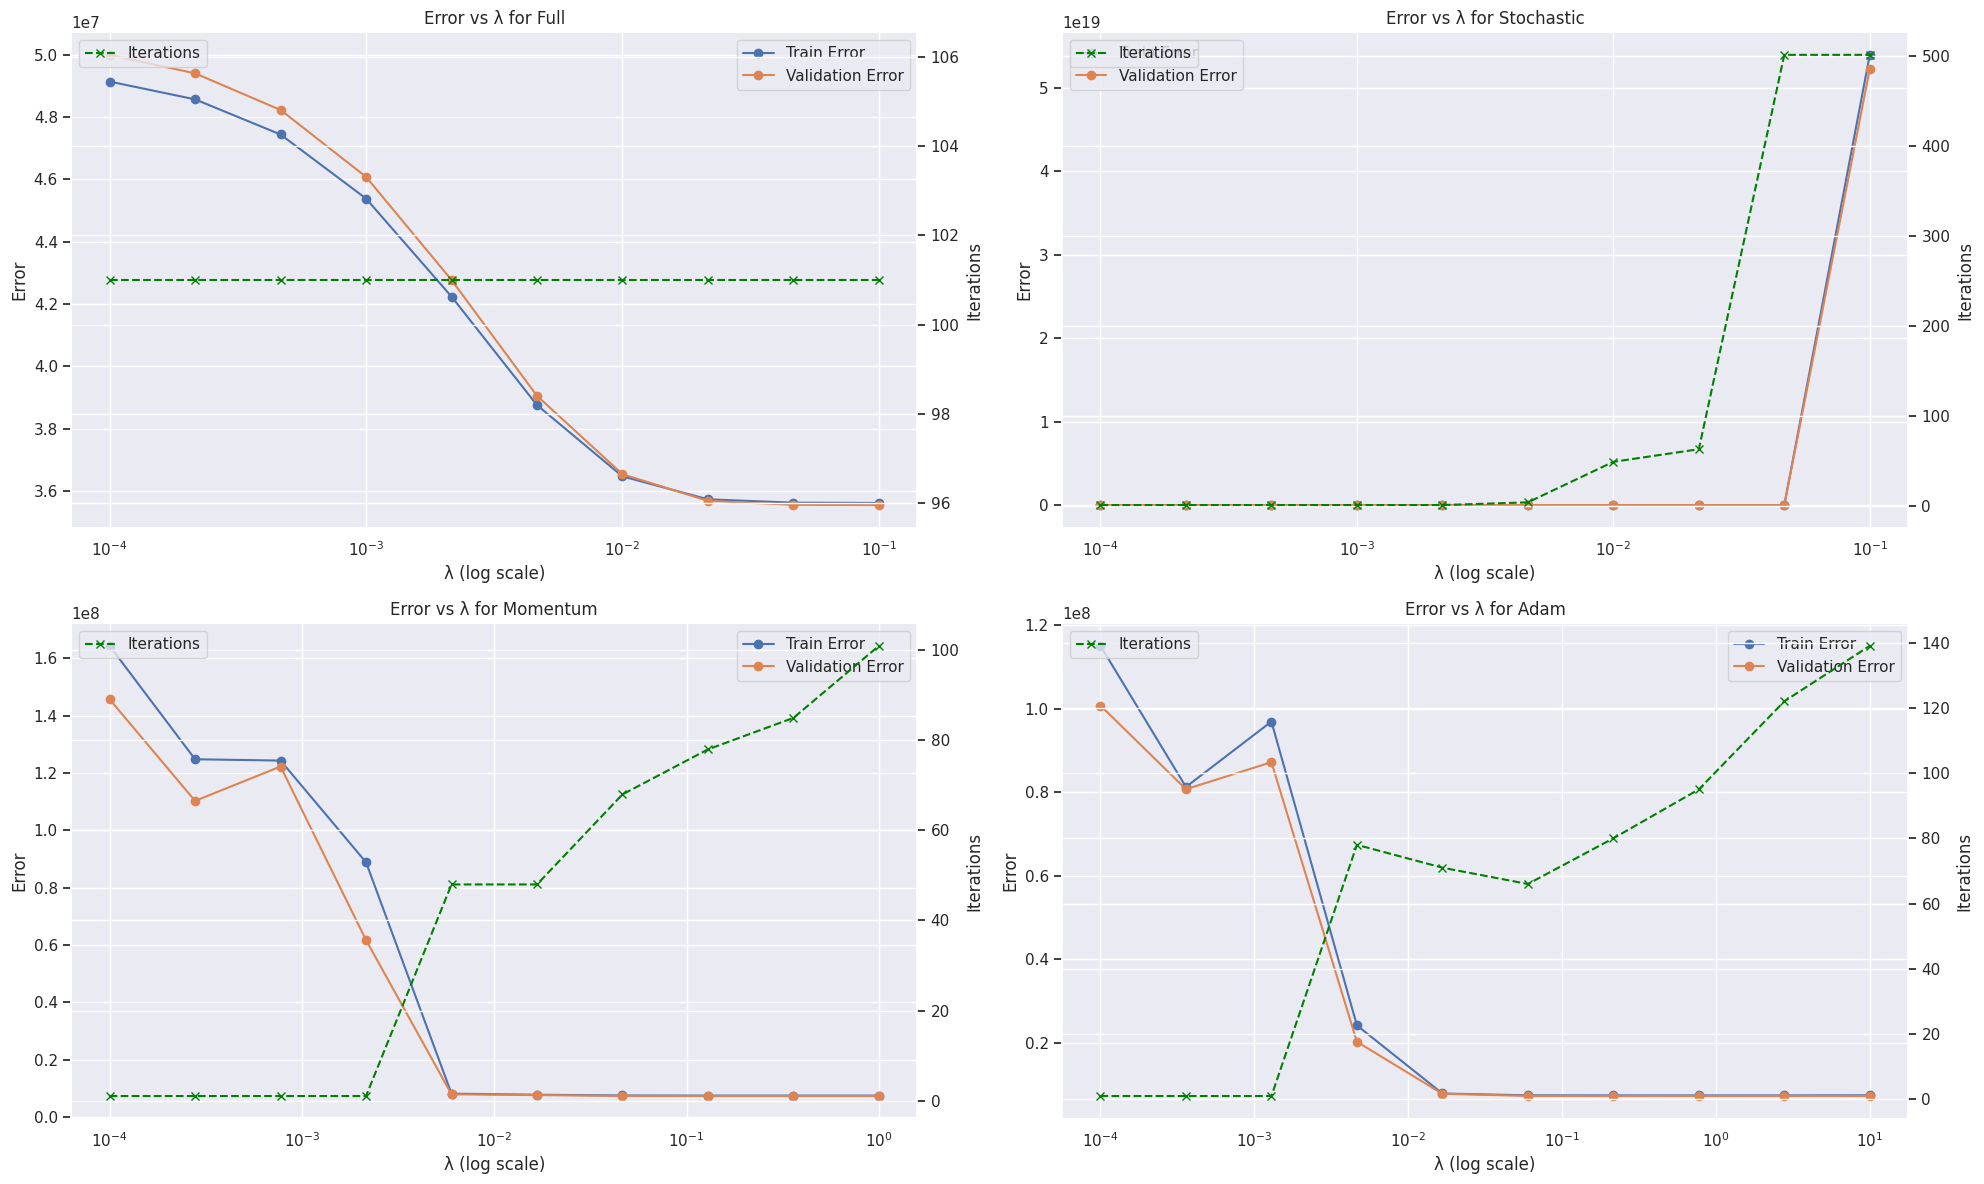

In [149]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
import matplotlib.pyplot as plt

# Создаем словарь для всех результатов
results_all_methods = {
    'full': results_full,
    'stochastic': results_stochastic,
    'momentum': results_momentum,
    'adam': results_adam
}

# Визуализация
plt.figure(figsize=(20, 12))

for i, (method, results) in enumerate(results_all_methods.items(), 1):
    lambdas = [res['lambda'] for res in results]
    train_errors = [res['train_error'] for res in results]
    val_errors = [res['val_error'] for res in results]
    iterations = [res['iterations'] for res in results]

    # График ошибок
    plt.subplot(2, 2, i)
    plt.plot(lambdas, train_errors, label='Train Error', marker='o')
    plt.plot(lambdas, val_errors, label='Validation Error', marker='o')
    plt.xscale('log')  # Логарифмическая шкала для λ
    plt.xlabel('λ (log scale)')
    plt.ylabel('Error')
    plt.title(f'Error vs λ for {method.capitalize()}')
    plt.legend()
    plt.grid(True)

    # График количества итераций (дополнительно)
    plt.twinx()
    plt.plot(lambdas, iterations, label='Iterations', marker='x', color='green', linestyle='--')
    plt.ylabel('Iterations')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

На основе представленных результатов можно сделать следующие выводы:

Метод Full Gradient Descent показывает стабильное снижение ошибок (Train Error и Val Error) при увеличении значения λ. Однако скорость сходимости низкая — требуется максимальное количество итераций (101) независимо от значения λ. Значения R2 улучшаются по мере увеличения λ, но остаются отрицательными, что говорит о слабой объясняющей способности модели. Кроме того, начинает расходится, пришлось уменьшить диапазон,  иначе получалсиь огромные странные числа

Метод Adam демонстрирует хорошую производительность при средних значениях λ. Ошибки (Train Error и Val Error) минимальны при λ ≈ 0.2154–0.7743, и R2 на валидационной выборке становится положительным, достигая значений около 0.665. Количество итераций увеличивается с ростом λ, но метод сохраняет устойчивость.

Метод Momentum Gradient Descent показывает стабильные результаты, схожие с Adam. При значениях λ от 0.1292 до 1.0 наблюдаются минимальные ошибки и положительные значения R2, что свидетельствует о высокой точности модели. Количество итераций для сходимости находится в умеренных пределах (около 85–101), что делает метод эффективным.

Метод Stochastic Gradient Descent проявляет значительную нестабильность. При высоких значениях λ ошибки (Train Error и Val Error) резко возрастают, а R2 становится огромным отрицательным числом. При средних значениях λ (около 0.0215) метод показывает положительное R2 на валидационной выборке, но качество модели хуже, чем у Adam и Momentum

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [157]:
#batch_sizes = np.arange(5, 500, 10)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

import time
from sklearn.metrics import mean_squared_error

# Размеры батча для исследования
batch_sizes = [1, 10, 50, 100, 500]

# Количество независимых запусков для каждого размера батча
num_runs = 10

# Список для хранения результатов
batch_results = []

for batch_size in batch_sizes:
    print(f"\nИсследование для размера батча: {batch_size}")

    total_time = 0
    total_iterations = 0

    for run in range(num_runs):
        print(f"  Запуск {run + 1} из {num_runs}")

        # Конфигурация стохастического градиентного спуска
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train_scaled.shape[1],
                'lambda_': 0.0215,  # фиксируем λ
                'batch_size': batch_size
            }
        }

        # Инициализация модели
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=1e-4,
            max_iter=500
        )

        # Замер времени обучения
        start_time = time.time()
        regression.fit(X_train_scaled, y_train_scaled)
        end_time = time.time()

        # Время обучения
        elapsed_time = end_time - start_time
        total_time += elapsed_time

        # Количество итераций
        total_iterations += len(regression.loss_history)

    # Среднее время и среднее количество итераций для данного размера батча
    avg_time = total_time / num_runs
    avg_iterations = total_iterations / num_runs

    batch_results.append({
        'batch_size': batch_size,
        'avg_time': avg_time,
        'avg_iterations': avg_iterations
    })

# Вывод результатов
for result in batch_results:
    print(f"Batch Size = {result['batch_size']} | Avg Time = {result['avg_time']:.4f} seconds | "
          f"Avg Iterations = {result['avg_iterations']:.2f}")




Исследование для размера батча: 1
  Запуск 1 из 10
  Запуск 2 из 10
  Запуск 3 из 10
  Запуск 4 из 10
  Запуск 5 из 10
  Запуск 6 из 10
  Запуск 7 из 10
  Запуск 8 из 10
  Запуск 9 из 10
  Запуск 10 из 10

Исследование для размера батча: 10
  Запуск 1 из 10
  Запуск 2 из 10
  Запуск 3 из 10
  Запуск 4 из 10
  Запуск 5 из 10
  Запуск 6 из 10
  Запуск 7 из 10
  Запуск 8 из 10
  Запуск 9 из 10
  Запуск 10 из 10

Исследование для размера батча: 50
  Запуск 1 из 10
  Запуск 2 из 10
  Запуск 3 из 10
  Запуск 4 из 10
  Запуск 5 из 10
  Запуск 6 из 10
  Запуск 7 из 10
  Запуск 8 из 10
  Запуск 9 из 10
  Запуск 10 из 10

Исследование для размера батча: 100
  Запуск 1 из 10
  Запуск 2 из 10
  Запуск 3 из 10
  Запуск 4 из 10
  Запуск 5 из 10
  Запуск 6 из 10
  Запуск 7 из 10
  Запуск 8 из 10
  Запуск 9 из 10
  Запуск 10 из 10

Исследование для размера батча: 500
  Запуск 1 из 10
  Запуск 2 из 10
  Запуск 3 из 10
  Запуск 4 из 10
  Запуск 5 из 10
  Запуск 6 из 10
  Запуск 7 из 10
  Запуск 8 из 10

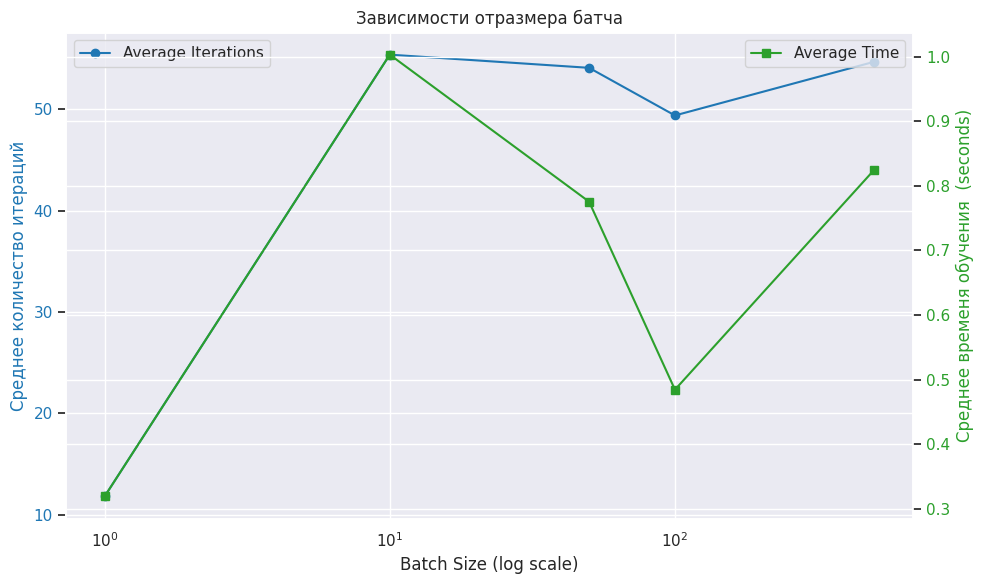

In [158]:
import matplotlib.pyplot as plt

# Данные из эксперимента
batch_sizes = [result['batch_size'] for result in batch_results]
avg_times = [result['avg_time'] for result in batch_results]
avg_iterations = [result['avg_iterations'] for result in batch_results]

# Построение графика
fig, ax1 = plt.subplots(figsize=(10, 6))

# Линия для среднего количества итераций
color = 'tab:blue'
ax1.set_xlabel('Batch Size (log scale)')
ax1.set_xscale('log')
ax1.set_ylabel('Среднее количество итераций', color=color)
ax1.plot(batch_sizes, avg_iterations, marker='o', color=color, label='Average Iterations')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Линия для среднего времени
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Среднее временя обучения  (seconds)', color=color)
ax2.plot(batch_sizes, avg_times, marker='s', color=color, label='Average Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Заголовок
plt.title('Зависимости отразмера батча')
plt.tight_layout()


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Для маленького размера батча (Batch Size = 1) требуется меньше времени, но больше итераций. Средние размеры батча (Batch Size = 50 или 100) обеспечивают баланс между временем обучения и количеством итераций. Большие размеры батча (Batch Size = 500) увеличивают время обучения без значительного уменьшения количества итераций. Оптимальный размер батча — 100, так как при минимальном времени достигается меньшее количество итераций.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ